Notebook utilisant les données INSEE et les indicateurs autour du développement durable
Objectif : évaluer les disparités entre départements en France métropolitaine en termes d'exposition à différents risques naturels 

In [3]:
pip install matplotlib #pas nécessaire si déjà installé 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.8/225.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importation des packages nécessaires 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#Importation des données INSEE (indicateurs développement durable à échelle départementale)
df = pd.read_csv("/Users/sophiebataille/Desktop/Projet_Python/ODD_CSV_V2/ODD_DEP.csv",sep=';',encoding_errors='ignore')
df.head()

/var/folders/vt/fkxw8l3d0cs7g11lypqmzxtm0000gn/T/ipykernel_5679/952170709.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sophiebataille/Desktop/Projet_Python/ODD_CSV_V2/ODD_DEP.csv",sep=';',encoding_errors='ignore')


,codgeo,libgeo,no_indic,ODD1,Cible1,ODD2,Cible2,type_var,variable,sous_champ,...,A2012,A2013,A2014,A2015,A2016,A2017,A2018,A2019,A2020,A2021
0,01,Ain,i001,1,1.2,NaN,NaN,i,taux_pvt,total,...,NaN,NaN,NaN,NaN,NaN,NaN,10.3,NaN,NaN,NaN
1,01,Ain,i001,1,1.2,NaN,NaN,i,taux_pvt,moins30,...,NaN,NaN,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN
2,01,Ain,i001,1,1.2,NaN,NaN,i,taux_pvt,30_39,...,NaN,NaN,NaN,NaN,NaN,NaN,11.8,NaN,NaN,NaN
3,01,Ain,i001,1,1.2,NaN,NaN,i,taux_pvt,40_49,...,NaN,NaN,NaN,NaN,NaN,NaN,11.4,NaN,NaN,NaN
4,01,Ain,i001,1,1.2,NaN,NaN,i,taux_pvt,50_59,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN


In [3]:
#Colonnes inutiles mais pas nécessaire de run 
df = df.drop(columns=['A1955','A1960','A1965','A1970','A1975','A1980','A1982','A1983','A1984','A1985','A1986','A1987','A1988','A1989','A1990','A1991','A1992','A1993','A1994','A1995','A1996','A1997','A1998','A1999'],axis=1)

In [3]:
#Entrée du département cible 
dep = input("Nom du département (avec majuscule)")

In [4]:
#Nombre de commune du département considéré classées à risque naturel majeur
#5 catégories : atmosphère, avalanche, feu de forêt, innondation, mouvement de terrain (+radon, séisme, erruption volcanique) 
risk_nat = df[(df['libgeo']== dep) & (df['variable']=='risq_nat_com')]
risk_nat.head() 

,codgeo,libgeo,no_indic,ODD1,Cible1,ODD2,Cible2,type_var,variable,sous_champ,...,A2012,A2013,A2014,A2015,A2016,A2017,A2018,A2019,A2020,A2021
69829,30,Gard,i097,13,13.1,11.0,11.5,i,risq_nat_com,Atm,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN
69830,30,Gard,i097,13,13.1,11.0,11.5,i,risq_nat_com,Ava,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN
69831,30,Gard,i097,13,13.1,11.0,11.5,i,risq_nat_com,Feu,...,351.0,351.0,351.0,351.0,NaN,NaN,351.0,NaN,351.0,NaN
69832,30,Gard,i097,13,13.1,11.0,11.5,i,risq_nat_com,Ino,...,351.0,351.0,351.0,351.0,NaN,NaN,351.0,NaN,351.0,NaN
69833,30,Gard,i097,13,13.1,11.0,11.5,i,risq_nat_com,Mvt,...,169.0,169.0,169.0,169.0,NaN,NaN,169.0,NaN,170.0,NaN


In [8]:
dep_reg = pd.read_csv("/Users/sophiebataille/Desktop/Projet_Python/Bases_Annexes/departements-region.csv")
dep_reg.head()

,num_dep,dep_name,region_name
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur


In [33]:
#On renome la colonne num_dep 
dep_reg.rename(columns={'num_dep':'codgeo'},inplace=True)
dep_reg.head(13)

,codgeo,dep_name,region_name
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur
5,06,Alpes-Maritimes,Provence-Alpes-Côte d'Azur
6,07,Ardèche,Auvergne-Rhône-Alpes
7,08,Ardennes,Grand Est
8,09,Ariège,Occitanie
9,10,Aube,Grand Est


In [13]:
#Jointure des dataframes risknats pour tous les départements et la base qui fait le lien entre départements et régions 
risques = pd.merge(df[(df['variable']=='risq_nat_com')],dep_reg,how="right",on=["codgeo"])
risques.head()

,codgeo,libgeo,no_indic,ODD1,Cible1,ODD2,Cible2,type_var,variable,sous_champ,...,A2014,A2015,A2016,A2017,A2018,A2019,A2020,A2021,dep_name,region_name
0,01,Ain,i097,13,13.1,11.0,11.5,i,risq_nat_com,Atm,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,Ain,Auvergne-Rhône-Alpes
1,01,Ain,i097,13,13.1,11.0,11.5,i,risq_nat_com,Ava,...,10.0,10.0,NaN,NaN,10.0,NaN,10.0,NaN,Ain,Auvergne-Rhône-Alpes
2,01,Ain,i097,13,13.1,11.0,11.5,i,risq_nat_com,Feu,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,Ain,Auvergne-Rhône-Alpes
3,01,Ain,i097,13,13.1,11.0,11.5,i,risq_nat_com,Ino,...,195.0,195.0,NaN,NaN,247.0,NaN,247.0,NaN,Ain,Auvergne-Rhône-Alpes
4,01,Ain,i097,13,13.1,11.0,11.5,i,risq_nat_com,Mvt,...,69.0,69.0,NaN,NaN,92.0,NaN,92.0,NaN,Ain,Auvergne-Rhône-Alpes


In [41]:
data_regions = pd.read_csv("/Users/sophiebataille/Desktop/Projet_Python/Bases_Annexes/data_regions.csv",sep=';')
data_regions.rename(columns={'Region':'region_name'},inplace=True)
data_regions.head()

,region_name,nb_communes,nb_hab,nb_dep
0,Auvergne-Rhône-Alpes,4095,"8,037",12
1,Bourgogne-Franche-Comté,3831,"2,813",8
2,Bretagne,1233,"3,336",4
3,Centre-Val de Loire,1783,"2,582",6
4,Corse,360,"0,337",2


In [45]:
R = pd.merge(risques.groupby(["region_name"])["A2020"].mean(),data_regions,how="right",on=["region_name"])
R.head(18)

,region_name,A2020,nb_communes,nb_hab,nb_dep
0,Auvergne-Rhône-Alpes,132.927083,4095,"8,037",12
1,Bourgogne-Franche-Comté,96.578125,3831,"2,813",8
2,Bretagne,146.343750,1233,"3,336",4
3,Centre-Val de Loire,67.770833,1783,"2,582",6
4,Corse,42.312500,360,"0,337",2
5,Grand Est,104.800000,5152,"5,548",10
6,Hauts-de-France,102.925000,3810,"6,023",5
7,Ile-de-France,NaN,1276,"12,246",8
8,Normandie,135.025000,2884,"3,342",5
9,Nouvelle-Aquitaine,104.489583,4404,"5,994",12


In [47]:
#DataFrame - proportion de commune considérées comme à risque dans chacune des régions de France métropolitaine (tout risque confondu)
R["A2020"] = R["A2020"]/R["nb_communes"]*R["nb_dep"]*100
R.rename(columns={'A2020':'Prop_communes'},inplace=True)
R.head(13)

,region_name,Prop_communes,nb_communes,nb_hab,nb_dep
0,Auvergne-Rhône-Alpes,38.952991,4095,"8,037",12
1,Bourgogne-Franche-Comté,20.167711,3831,"2,813",8
2,Bretagne,47.475669,1233,"3,336",4
3,Centre-Val de Loire,22.805665,1783,"2,582",6
4,Corse,23.506944,360,"0,337",2
5,Grand Est,20.341615,5152,"5,548",10
6,Hauts-de-France,13.507218,3810,"6,023",5
7,Ile-de-France,NaN,1276,"12,246",8
8,Normandie,23.409327,2884,"3,342",5
9,Nouvelle-Aquitaine,28.471276,4404,"5,994",12


In [52]:
R = R.sort_values(by="Prop_communes")
R.head(13)

,region_name,Prop_communes,nb_communes,nb_hab,nb_dep
6,Hauts-de-France,13.507218,3810,"6,023",5
1,Bourgogne-Franche-Comté,20.167711,3831,"2,813",8
5,Grand Est,20.341615,5152,"5,548",10
3,Centre-Val de Loire,22.805665,1783,"2,582",6
8,Normandie,23.409327,2884,"3,342",5
4,Corse,23.506944,360,"0,337",2
9,Nouvelle-Aquitaine,28.471276,4404,"5,994",12
10,Occitanie,30.718115,4477,"5,903",13
11,Pays de la Loire,33.378906,1280,"3,787",5
0,Auvergne-Rhône-Alpes,38.952991,4095,"8,037",12


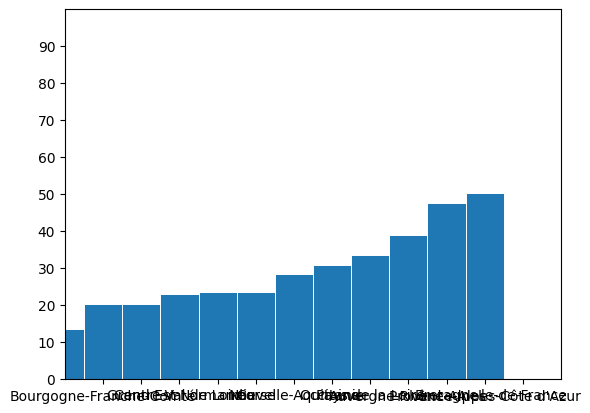

In [53]:
#Visualisation graphique des disparités entre région 
fig, ax = plt.subplots()
x=R["region_name"]
y=R["Prop_communes"]
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 13), xticks=np.arange(1, 13),
       ylim=(0, 100), yticks=np.arange(0, 100,10))
ax.

plt.show()

In [5]:
#dataframe contenant le % de commune du département considéré classées "risque naturel majeur", 
data_dep = pd.concat([risk_nat["sous_champ"],risk_nat["A2020"]/589*100],axis=1)
data_dep.head(8) 

,sous_champ,A2020
69829,Atm,0.000000
69830,Ava,0.000000
69831,Feu,59.592530
69832,Ino,59.592530
69833,Mvt,28.862479
69834,Rad,0.000000
69835,Sei,58.404075
69836,Vol,0.000000


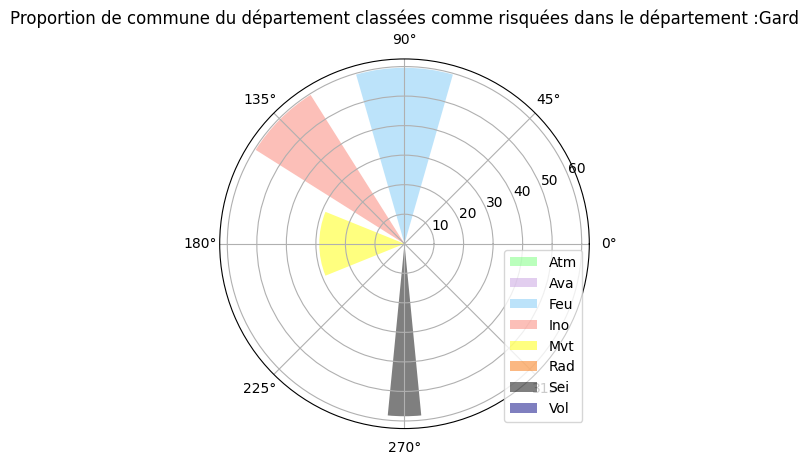

In [6]:
#Visualisation graphique 

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 8
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data_dep["A2020"].to_numpy()
width = np.pi / 4 * np.random.rand(N)
colors = ["#76FF7B","#C79FE0","#7BC8F6","#FA8072","#FFFF00","#F97306","#000000","#000080"]

ax = plt.subplot(projection='polar')
labels = data_dep["sous_champ"]
ax.bar(theta, radii, width=width, color=colors, bottom=0.0, alpha=0.5,label=labels)
ax.legend(loc="lower right")
ax.set_title("Proportion de commune du département classées comme risquées dans le département :"+str(dep))

plt.show()